# Project Overview
## Description
Sample Penetration report – Megacorp One

https://www.offensive-security.com/reports/sample-penetration-testing-report.pdf



# Executive Summary
Offensive  Security  was  contracted  by  MegaCorp  One  to  conduct  a  penetration  test  in  order  to determine its exposure to a targeted attack. All activities were conducted in a manner that simulated a malicious actor engaged in a targeted attack against MegaCorp One with the goals of:

- Identifying if a remote attacker could penetrate MegaCorp One’s defenses
- Determining the impact of a security breach on:
- Confidentiality of the company’s private data
- Internal infrastructure and availability of MegaCorp One’s information systems

Efforts were placed on the identification and exploitation of security weaknesses that could allow a remote attacker to gain unauthorized access to organizational data. The attacks were conducted with the  level  of  access  that  a general Internet  user  would  have.   The  assessment  was  conducted  in accordance  with  the recommendations outlined in NIST SP 800-1151 with all tests and actions being conducted under controlled conditions.

Initial reconnaissance of the MegaCorp One network resulted in the discovery of a misconfigured DNS server that allowed a DNS zone transfer. The results provided us with a listing of specific hosts to target for  this  assessment.  An  examination  of  these  hosts  revealed  a  password-protected administrative webserver interface. After creating a custom wordlist using terms identified on the MegaCorp One ’s website we were able to gain access to this interface by uncovering the password via brute-force. An  examination  of  the  administrative  interface revealed  that  it  was  vulnerable  to  a  remote  code injection vulnerability, which was used to obtain interactive access to the underlying operating system.

This  initial  compromise  was  escalated  to  administrative  access due to a lack of appropriate  system updates on the webserver. After a closer examination, we discovered that the compromised webserver utilizes a Java applet for administrative users. We added a malicious payload to this applet, which gave us interactive access to workstations used by MegaCorp One’s administrators.

Using the compromised webserver as a pivot point along with passwords recovered from it, we were able to target previously inaccessible internal resources. This resulted in Local Administrator access to numerous  internal  Windows  hosts, complete compromise of a Citrix server, and full administrative control of the Windows Active Directory infrastructure. Existing network traffic controls were bypassed through encapsulation of malicious traffic into allowed protocols.

## Summary of Findings Identified



In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
width = 0.80

severity = ['Critical', 'High', 'Medium', 'Low', 'Informational']
value = [1,0,2,0,0]

plt.title('Breakdown by Severity')

ax.bar(severity[0], value[0], color='#CC0000', width=width)
ax.bar(severity[1], value[1], color='#FF0000', width=width)
ax.bar(severity[2], value[2], color='#FC7F03', width=width)
ax.bar(severity[3], value[3], color='#05B04F', width=width)
ax.bar(severity[4], value[4], color='#002060', width=width)

plt.show()


**# 1 Critical** Administrative  Privilege  Escalation

**# 2 Medium** Admin  Webserver  Interface  Compromise

**# 3 Medium** Citrix  Environment  Compromise

## Scope
### In Scope
MegaCorp One network

### Out of Scope
* DoS
* OSINT




## Methodology
**OSSTMM**

The OSSTMM framework, one of the most recognized standards in the industry, provides a scientific methodology for network penetration testing and vulnerability assessment.




## Recommendations
Due  to  the  impact  to  the  overall  organization  as  uncovered  by  this  penetration  test,  appropriate resources should be allocated to ensure that remediation efforts are accomplished in a timely manner. While  a  comprehensive  list  of  items  that  should  be  implemented  is  beyond  the  scope  of  this engagement, some high level items are important to mention .

Offensive Security recommends the following:

1. Ensure  that  strong  credentials  are  use  everywhere  in  the  organization. The compromise of MegaCorp One system as drastically impacted by the use of weak passwords as well as the reuse of passwords across systems of differing security levels.  NIST SP 800-119 is recommended for guidelines on operating an enterprise password policy. While this issue was not widespread within MegaCorp One, it was still an issue and should be addressed.

2. Establish trust boundaries. Create logical boundaries of trust where appropriate on the internal network.  Each  logical  trust  segment  should  be able to be compromised without  the breach easily  cascading  to  other  segments.  This  should  include  the  use  of   unique  administrative accounts so that a compromised system in one segment cannot be used in other locations.

3. Implement and enforce implementation of change control across all systems: Misconfiguration and insecure deployment issues were discovered across the various systems. The vulnerabilities that arose can be mitigated through the use of change control processes on all server systems.

4. Implement a patch management program: Operating a consistent patch management program per the guidelines outlined in NIST SP 800-4010 is an important component in maintaining good security posture. This will help to limit the attack surface that results from running unpatched internal services.

5. Conduct regular vulnerability assessments. As part of an effective organizational risk management strategy, vulnerability assessments should be conducted on a regular basis. Doing so  will  allow  the  organization  to  determine  if  the  installed  security  controls  are  properly installed, operating as intended, and producing the desired outcome. Please consult NIST SP 800-3011  for guidelines on operating an effective risk management program.




# Findings and Risk Analysis




## Administrative  Privilege  Escalation
**Severity:** Critical

**CVSS Score:** 9.9 (CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:C/C:H/I:H/A:H)

**CWE:** 77 - Improper Neutralization of Special Elements used in a Command (&#x27;Command Injection&#x27;)

**Description**

With interactive access to the underlying operating system of the administrative webserver obtained, we  continued  with  the  examination  of  the  system  searching  for  ways to escalate privileges to the administrative level. We found that the system was vulnerable to a local privilege escalation exploit4, which we were able to utilize successfully. Please see Appendix A for more information.

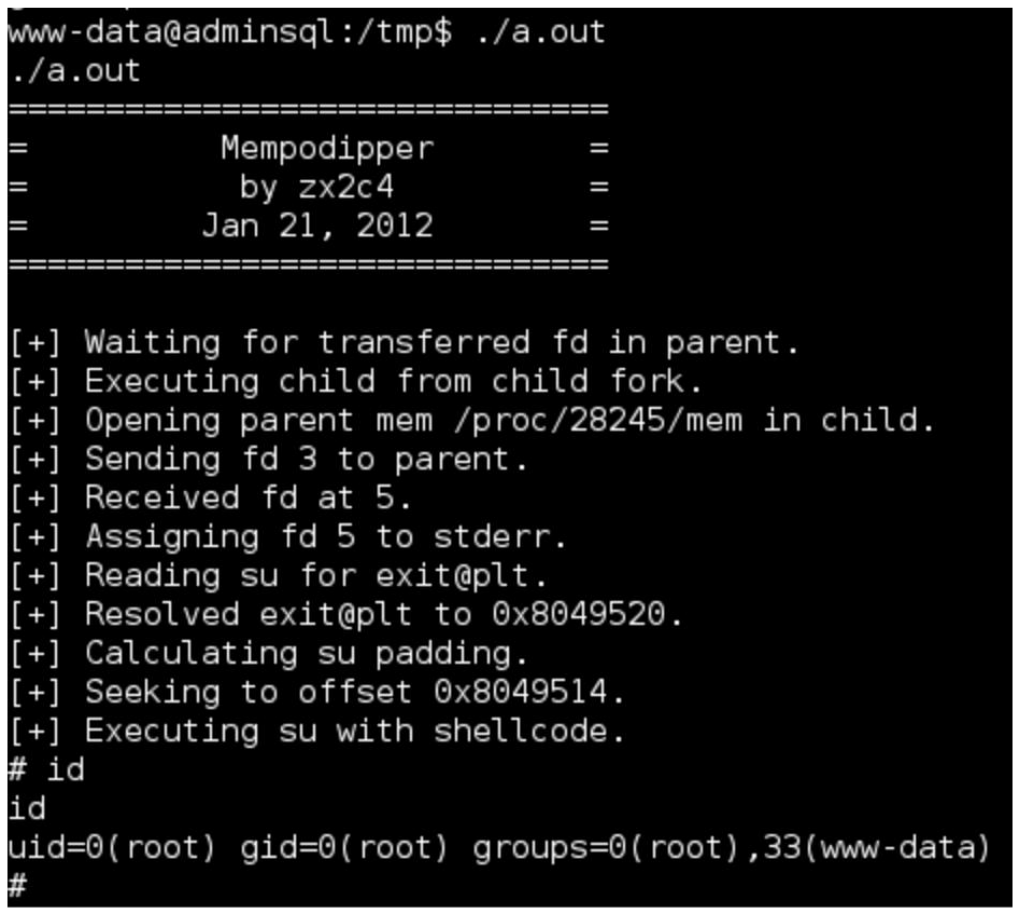{ width=60% }

**Location**

administrative webserver

**Impact**

The  use  of  this  exploit  was  partially  made  possible  due  to the inclusion  of developer tools on the vulnerable system. If these tools were not present on the system, it woul d have still been possible to successfully exploit, although the difficulty in doing so would have been increased.  In its current configuration, the webserver represents an internal attack platform for a malicious party.

With the ability to gain full administrative access, a malicious party could utilize this vulnerable system for a multitude of purposes, ranging from attacks against MegaCorp One itself, to attacks against its customers. It’s highly likely that the attackers would leverage this system for both purposes.

**Recommendation**

All corporate assets should be kept current with latest vendor-supplied security patches. This can be achieved with vendor-native tools or third-party applications,  which  can  provide  an  overview  of  all  missing  patches. In many instances, third-party tools can also be used for patch deployment throughout a heterogeneous environment

**References**

http://www.exploit-db.com/exploits/18411/

https://www.offensive-security.com/reports/sample-penetration-testing-report.pdf

**Additional notes**



Appendix A: About Offensive Security



Conti PWC




## Admin  Webserver  Interface  Compromise
**Severity:** Medium

**CVSS Score:** 6.4 (CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:C/C:L/I:L/A:N)

**CWE:** 80 - Improper Neutralization of Script-Related HTML Tags in a Web Page (Basic XSS)

**Description**

The admin.megacorpone.com webserver was found to be running an Apache webserver on port 81. Accessing the root URL of this site resulted in the display of a blank page. We next conducted a quick enumeration scan of the system looking for common directories and files.

The scan results revealed that along with common Apache default files (Please see Appendix A for more information), we identified an “/admin” directory that was only accessible after authentication.

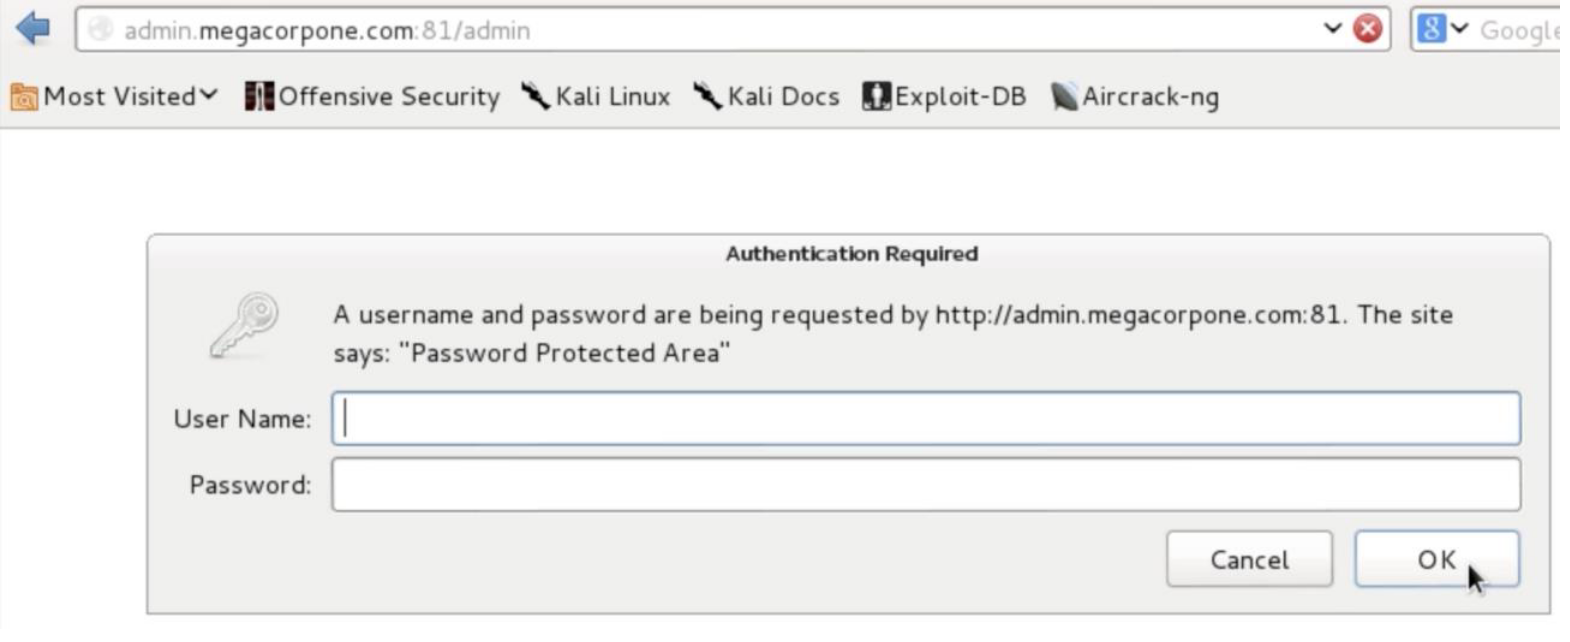{ width=75% }


To prepare a targeted brute-force attempt against this system, we compiled a custom dictionary file  based on the content of the www.megacorpone.com website. The initial dictionary consisted of 331 custom  words,  which  were  then  put  through  several  rounds  of  permutations  and  substitutions  to produce a final dictionary file of 16,201 words. This dictionary file was used along with the username “/admin” against the protected section of the site.

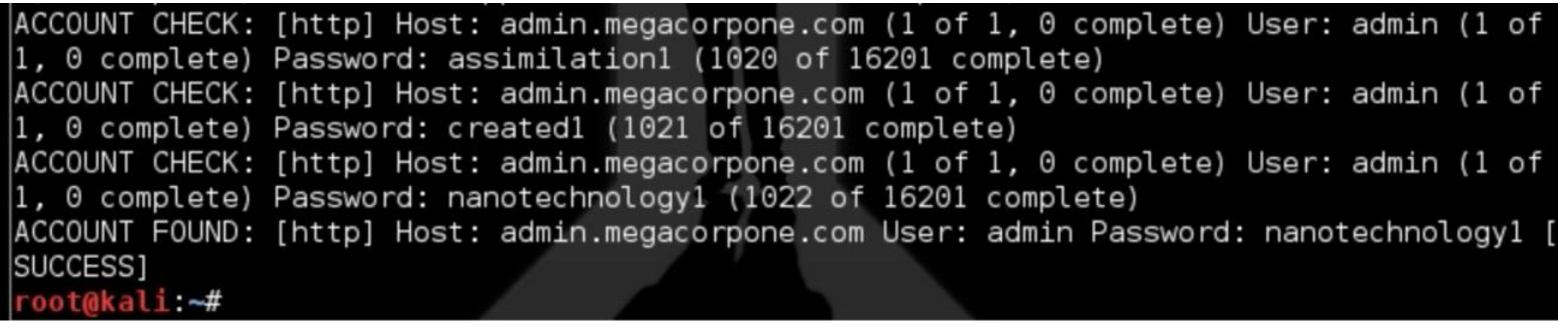{ width=75% }

**Location**

admin.megacorpone.com

**Impact**

Using  common  enumeration  and  brute -forcing  techniques,  it  is  possible  to retrieve the administrative password for the SQLite Manager web interface. Due to the lack of any additional authentication mechanisms, it is also possible to retrieve all user password hashes in the underlying database. Successful retrieval of plaintext passwords could allow further compromise of the target environment if password reuse is found to exist.

**Recommendation**

Ensure that all administrative interfaces are protected with comp lex passwords or passphrases. Avoid use of common or business related words, which could be found or easily constructed with the help of a dictionary.

**References**

https://owasp.org/www-project-top-ten/2017/A2_2017-Broken_Authentication

https://www.offensive-security.com/reports/sample-penetration-testing-report.pdf

**Additional notes**



N/A



## Citrix  Environment  Compromise
**Severity:** Medium

**CVSS Score:** 6.3 (CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:C/C:L/I:L/A:L)

**CWE:** 16 - Configuration

**Description**

Using remote desktop access to the internal network, we proceeded to explore the network in search of high value targets. One such target appeared to be a Citrix server, which was set as the homepage on the compromised host. Using the same credentials that were utilized to establish the remote desktop connection, we were able to successfully login to this Citrix environment.

This Citrix environment exposed “Internet Explorer” as the only available application. This is a commonly utilized method by many organizations to limit access to the underlying operating syste m of the Citrix server. It is important to note that many methods exist to bypass this configuration. In this case, we utilized  the  “Save” dialog  window  to create  a  batch  file  that  would  provide  us  with  a  Powershell interface.  This is possible as the “Save” dialog operates in much the same manner as a standard “Windows Explorer” file management window.

**Location**

Citrix environment

**Impact**

This allowed us to gain full administrative control of the Citrix system

**Recommendation**

All corporate assets should be kept current with latest vendor-supplied security patches. This can be achieved with vendor-native tools or third-party applications,  which  can  provide  an  overview  of  all  missing  patches. In many instances, third-party tools can also be used for patch deployment throughout a heterogeneous environment.

**References**

https://www.offensive-security.com/reports/sample-penetration-testing-report.pdf

**Additional notes**



N/A



# Additional Notes




## Appendix A: About Offensive Security

Offensive  Security  advocates  penetration  testing  for  impact  as  opposed  to  penetration  testing for coverage. Penetration testing for coverage has risen in popularity in recent years as a simplified method  of assessments used in situations where the goal is to meet regulatory needs. As a form of vulnerability scanning, penetration testing for coverage includes selective verification of d iscovered issues through exploitation. This allows service providers  the ability to conduct the work largely through the use of automated toolsets and maintain consistency of product across multiple engagements.  Penetration testing for impact is a form of attack simulation under controlled conditions, which closely mimics  the  real  world,  targeted  attacks  that  organizations  face  on  a  day-to-day  basis.  Penetration testing for impact is a goal-based assessment, which creates more than a simple vulnerability inventory, instead providing the true business impact of a breach. An impact-based penetration test identifies areas for improvement that will result in the highest rate of return for the business.  Penetration testing for impact poses the challenge of requiring a high skillset to successfully complete.

As demonstrated in this sample report, Offensive Security believes that it is uniquely qualified to deliver world-class results when conducting penetration tests for impact, due to the level of expertise found within our team of security professionals. Offensive Security does not maintain a separate team for penetration  testing  and  other  activities  that  the  company  is engaged in. This means that the same individuals that are involved in Offensive Security’s industry leading performance-based training, the production of industry standard tools such as Kali Linux, authors of best selling books, creators of 0-day exploits, and maintainers of industry references such as Exploit-DB are the same individuals that are involved in the delivery of services. Offensive Security offers a product that cannot be matched in the market. However, we may not be the right fit for every job. Offensive Security typically conducts consulting services with a low volume, high skill ratio to allow Offensive Security staff to more closely mimic real world situations. This also allows customers to have increased access to industry-recognized expertise all while keeping costs re asonable.

As such, high volume/fast turn-around engagements are often not a good fit for our services. Offensive Security is focused on conducting high quality, high impact assessments and is actively sought out by customers in need of services that cannot be delivered by other vendors.




# Attack Flows




## Conti PWC

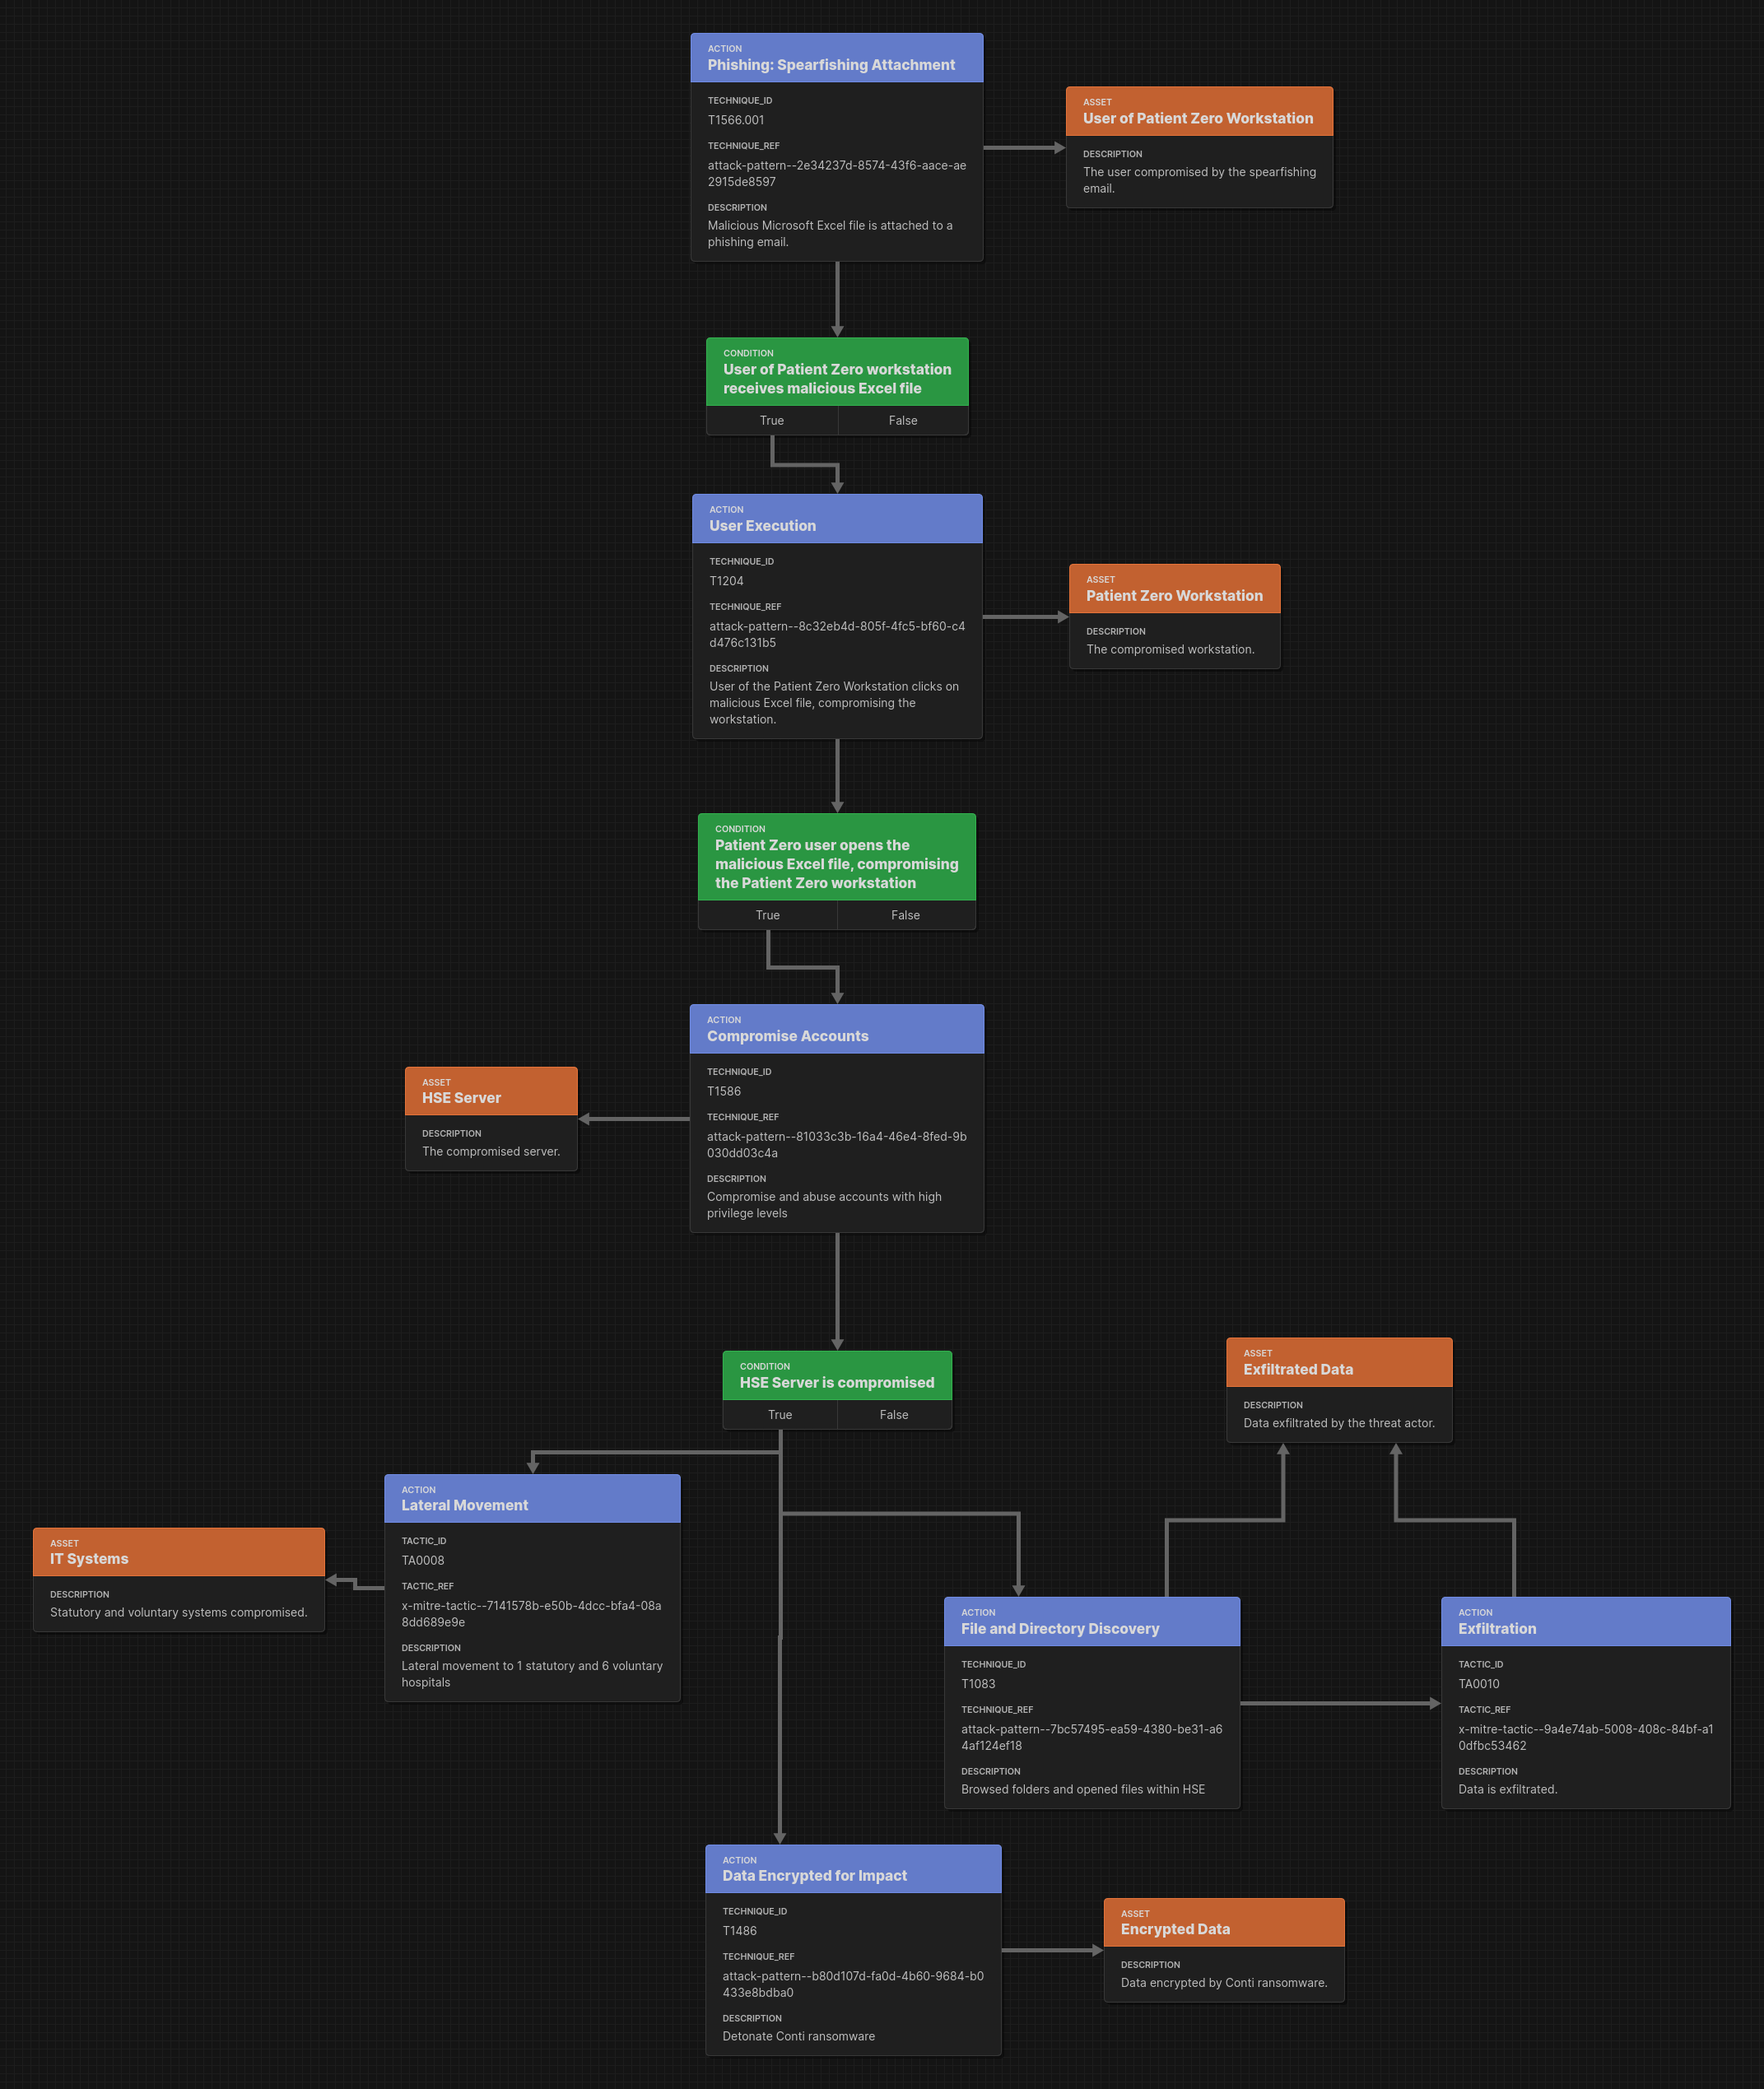




---
title: "Offensive Security network"

product: "MegaCorp One"

author: ["Pentest company", "Report ID: PEN-DOC-202108140857"]

date: "14-08-2021"

subject: "Pentest Report"

subtitle: "PEN-DOC-202108140857"

website: https://github.com/1modm/petereport

---
